In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
insiders_df = pd.read_csv(r"D:\Hagar\Documents\uOttawa\Second Term\ELG7186 -  AI for Cyber Security\4- Project\Dataset\r5.2\answers\insiders.csv")
DATASET_VER = 5.2

insiders_df = insiders_df[insiders_df['dataset'] == DATASET_VER]
insiders_df.head()

,dataset,scenario,details,user,start,end
82,5.2,1,r5.2-1-ALT1465.csv,ALT1465,08/13/2010 22:16:10,08/20/2010 04:01:32
83,5.2,1,r5.2-1-ALW0764.csv,ALW0764,02/03/2011 07:09:09,02/05/2011 06:12:51
84,5.2,1,r5.2-1-AYG1697.csv,AYG1697,10/25/2010 23:19:22,10/26/2010 00:06:28
85,5.2,1,r5.2-1-DAS1320.csv,DAS1320,07/09/2010 01:14:15,07/15/2010 01:38:58
86,5.2,1,r5.2-1-DNJ0740.csv,DNJ0740,10/04/2010 19:56:42,10/05/2010 01:01:37


In [6]:
MALICIOUS_USERS = insiders_df['user'].values

In [10]:
insiders_df['start'] = pd.to_datetime(insiders_df['start'])
insiders_df['end'] = pd.to_datetime(insiders_df['end'])
insiders_df.head()

,dataset,scenario,details,user,start,end
82,5.2,1,r5.2-1-ALT1465.csv,ALT1465,2010-08-13 22:16:10,2010-08-20 04:01:32
83,5.2,1,r5.2-1-ALW0764.csv,ALW0764,2011-02-03 07:09:09,2011-02-05 06:12:51
84,5.2,1,r5.2-1-AYG1697.csv,AYG1697,2010-10-25 23:19:22,2010-10-26 00:06:28
85,5.2,1,r5.2-1-DAS1320.csv,DAS1320,2010-07-09 01:14:15,2010-07-15 01:38:58
86,5.2,1,r5.2-1-DNJ0740.csv,DNJ0740,2010-10-04 19:56:42,2010-10-05 01:01:37


In [11]:
insiders_df.start.dt.weekday

82     4
83     3
84     0
85     4
86     0
      ..
176    0
177    4
178    1
179    2
180    2
Name: start, Length: 99, dtype: int64

In [12]:
insiders_df['duration'] = (insiders_df['end'] - insiders_df['start']).dt.days
insiders_df.head()

,dataset,scenario,details,user,start,end,duration
82,5.2,1,r5.2-1-ALT1465.csv,ALT1465,2010-08-13 22:16:10,2010-08-20 04:01:32,6
83,5.2,1,r5.2-1-ALW0764.csv,ALW0764,2011-02-03 07:09:09,2011-02-05 06:12:51,1
84,5.2,1,r5.2-1-AYG1697.csv,AYG1697,2010-10-25 23:19:22,2010-10-26 00:06:28,0
85,5.2,1,r5.2-1-DAS1320.csv,DAS1320,2010-07-09 01:14:15,2010-07-15 01:38:58,6
86,5.2,1,r5.2-1-DNJ0740.csv,DNJ0740,2010-10-04 19:56:42,2010-10-05 01:01:37,0


In [13]:
import glob
import os

def get_user_from_path(path):
    user = path.split('/')[-1].split('.csv')[0].split('-')[-1]
    return user

def read_malicious_events(answers_dir, dataset_ver=5.2):
    mal_event_paths = glob.glob(os.path.join(answers_dir, f'r{dataset_ver}-*/*'))
    mal_users = [get_user_from_path(p) for p in mal_event_paths]
    mal_user_events = {user: read_answer_file(path)
                       for (user, path) in zip(mal_users, mal_event_paths)}
    return mal_user_events
    
def read_answer_file(path):
    df = pd.read_csv(path, header=None, usecols=[0,1,2,3,4]).rename(columns={0: 'action',
                                                                            1: 'ID',
                                                                            2: 'date',
                                                                            3: 'user',
                                                                            4: 'pc'})
    df['date'] = pd.to_datetime(df['date']).dt.normalize()
    return df


def is_malicious(row, mal_users_events):
    if(row['user'] not in mal_users_events):
        return 0
    else:
        user_df = mal_users_events[row['user']]
        mal_events_count = user_df[(user_df['date'] > row['Logon']) &
                                   (user_df['date'] < row['Logoff'])].shape[0]
        return int(mal_events_count > 0)
    

def is_malicious(row, mal_users_events):
    if(row['user'] not in mal_users_events):
        return 0
    else:
        user_df = mal_users_events[row['user']]
        mal_events_count = user_df[(user_df['date'] == row['day'])].shape[0]
        return int(mal_events_count > 0)

In [15]:
mal_users_events = read_malicious_events(r"D:\Hagar\Documents\uOttawa\Second Term\ELG7186 -  AI for Cyber Security\4- Project\Dataset\r5.2\answers")

In [16]:
mal_users_events

{'ALT1465':     action                        ID       date     user       pc
 0    logon  {P2W1-C6NJ88YS-2909NGZE} 2010-08-13  ALT1465  PC-3407
 1   device  {C4E8-U7VA71XB-2459TEID} 2010-08-14  ALT1465  PC-3407
 2     file  {W9G3-I1CS71CS-0820ZYMV} 2010-08-14  ALT1465  PC-3407
 3     file  {G5K6-O2YE47VU-9563XUCP} 2010-08-14  ALT1465  PC-3407
 4     http  {A3E3-X7SI99EX-9244RSZL} 2010-08-14  ALT1465  PC-3407
 5   device  {B4E9-F6MN73VT-6447KWCV} 2010-08-14  ALT1465  PC-3407
 6    logon  {Q1H8-G2JY71XD-1311ZYCP} 2010-08-14  ALT1465  PC-3407
 7    logon  {L8S7-G7EW61IE-4717DETT} 2010-08-20  ALT1465  PC-3407
 8   device  {A9P0-K0XF86GQ-4210KGHU} 2010-08-20  ALT1465  PC-3407
 9     file  {D5D1-X1MP25SL-8923WHZW} 2010-08-20  ALT1465  PC-3407
 10    http  {M6P3-J1RX14LO-9872PEIX} 2010-08-20  ALT1465  PC-3407
 11  device  {J4W9-J7EG27HB-0380MXVN} 2010-08-20  ALT1465  PC-3407
 12   logon  {R3O3-R8QX66KC-2147JMAJ} 2010-08-20  ALT1465  PC-3407,
 'ALW0764':     action                        ID  

# Read data 

In [17]:
def is_weekend(x):
    if (x == 5) or (x == 6):
        return 1
    else:
        return 0

def is_working_hour(x):
    if(x >= 7 and x <= 18):
        return 1
    else:
        return 0

In [19]:
import os 
import pandas as pd

# Move all this shit to a function

dataset_path = r"D:\Hagar\Documents\uOttawa\Second Term\ELG7186 -  AI for Cyber Security\4- Project\Dataset\r5.2\sampled dataset"
logon_df = pd.read_csv(os.path.join(dataset_path, 'logon.csv'))
logon_df['date'] = pd.to_datetime(logon_df['date'])
logon_df['hour'] = logon_df['date'].dt.hour
logon_df['weekday'] = logon_df['date'].dt.weekday
logon_df['is_weekend'] = logon_df['weekday'].apply(is_weekend)
logon_df['is_working_hour'] = logon_df['hour'].apply(is_working_hour)
logon_df['day'] = logon_df['date'].dt.normalize()

device_df = pd.read_csv(os.path.join(dataset_path, 'device.csv'))
device_df['date'] = pd.to_datetime(device_df['date'])
device_df['weekday'] = device_df['date'].dt.weekday
device_df['hour'] = device_df['date'].dt.hour
device_df['is_weekend'] = device_df['weekday'].apply(is_weekend)
device_df['is_working_hour'] = device_df['hour'].apply(is_working_hour)
device_df['day'] = device_df['date'].dt.normalize()

file_df = pd.read_csv(os.path.join(dataset_path, 'file.csv'))
file_df['date'] = pd.to_datetime(file_df['date'])
file_df['weekday'] = file_df['date'].dt.weekday
file_df['hour'] = file_df['date'].dt.hour
file_df['is_weekend'] = file_df['weekday'].apply(is_weekend)
file_df['is_working_hour'] = file_df['hour'].apply(is_working_hour)
file_df['day'] = file_df['date'].dt.normalize()

http_df = pd.read_csv(os.path.join(dataset_path, 'http.csv'))
http_df['date'] = pd.to_datetime(file_df['date'])
http_df['weekday'] = http_df['date'].dt.weekday
http_df['hour'] = http_df['date'].dt.hour
http_df['is_weekend'] = http_df['weekday'].apply(is_weekend)
http_df['is_working_hour'] = http_df['hour'].apply(is_working_hour)
http_df['day'] = http_df['date'].dt.normalize()

email_df = pd.read_csv(os.path.join(dataset_path, 'email.csv'))
email_df['date'] = pd.to_datetime(file_df['date'])
email_df['day'] = email_df['date'].dt.normalize()

In [20]:
logon_df.head()

,id,date,user,pc,activity,hour,weekday,is_weekend,is_working_hour,day
0,{U0U5-J2AX64NN-7430KKNP},2010-01-02 07:27:00,VRP0267,PC-5687,Logon,7,5,1,1,2010-01-02
1,{B0G5-P2XR80RE-6009PRBI},2010-01-02 07:34:00,IRH1224,PC-4126,Logon,7,5,1,1,2010-01-02
2,{R3Z9-U5YR87BS-2979BOUZ},2010-01-02 07:40:00,ELT1370,PC-1929,Logon,7,5,1,1,2010-01-02
3,{X0C4-S3RJ20AY-4832PPRI},2010-01-02 07:41:00,JMM0613,PC-7127,Logon,7,5,1,1,2010-01-02
4,{U3L5-D8ZD99IK-6715VWBI},2010-01-02 07:45:00,GVM1337,PC-6338,Logon,7,5,1,1,2010-01-02


https://stackoverflow.com/questions/30990389/pandas-break-categorical-column-to-multiple-columns

In [ ]:
logon_daily_events = pd.DataFrame({"count": logon_df.groupby(["user", "activity", 
                                                              "day", "is_working_hour"]).size()})\
                                                            .reset_index()

logon_daily_events = logon_daily_events.set_index(['user', 'activity', 'day', 'is_working_hour'])\
                                                    .unstack(["is_working_hour", 'activity'])

#logon_daily_events.columns = ['{}_{}_{}'.format(t, v) for v,t in logon_daily_events.columns]
logon_daily_events = logon_daily_events.reset_index()
logon_daily_events

user        day  count                   
is_working_hour                          0      1           0
activity                            Logoff Logoff Logon Logon
0                AAL1327 2010-01-04    1.0    NaN   1.0   NaN
1                AAL1327 2010-01-05    NaN    1.0   1.0   NaN
2                AAL1327 2010-01-06    1.0    NaN   1.0   NaN
3                AAL1327 2010-01-07    NaN    1.0   1.0   NaN
4                AAL1327 2010-01-08    1.0    NaN   1.0   NaN
...                  ...        ...    ...    ...   ...   ...
62473            ZKP0542 2011-01-31    NaN    1.0   NaN   1.0
62474            ZKP0542 2011-02-01    NaN    1.0   NaN   1.0
62475            ZKP0542 2011-02-02    NaN    1.0   NaN   1.0
62476            ZKP0542 2011-02-03    NaN    1.0   NaN   1.0
62477            ZKP0542 2011-02-04    NaN    1.0   NaN   1.0

[62478 rows x 6 columns]

In [ ]:
logon_daily_events.columns

MultiIndex([( 'user', '',       ''),
            (  'day', '',       ''),
            ('count',  0, 'Logoff'),
            ('count',  1, 'Logoff'),
            ('count',  1,  'Logon'),
            ('count',  0,  'Logon')],
           names=[None, 'is_working_hour', 'activity'])

In [ ]:
device_daily_events = pd.DataFrame({"device_count": device_df.groupby(["user", "activity", "day"]).size()}).reset_index()
device_daily_events = device_daily_events.set_index(['user', 'activity', 'day']).unstack(['activity'])
device_daily_events.columns = ['{}_{}'.format(t, v) for v,t in device_daily_events.columns]
device_daily_events = device_daily_events.reset_index()
device_daily_events
#device_daily_events

In [ ]:
file_daily_events = pd.DataFrame({"count": file_df.groupby(["user", "activity", "day"]).size()}).reset_index()
file_daily_events = file_daily_events.set_index(['user', 'activity', 'day']).unstack(['activity'])
file_daily_events.columns = ['{}_{}'.format(t, v) for v,t in file_daily_events.columns]
file_daily_events = file_daily_events.reset_index()
file_daily_events

,user,day,File Open_count,File Write_count
0,ACA1126,2010-12-02,1.0,1.0
1,ACM1770,2011-03-17,9.0,NaN
2,ACM1770,2011-03-29,5.0,NaN
3,ACM1770,2011-04-06,2.0,NaN
4,ACM1770,2011-04-19,11.0,NaN
...,...,...,...,...
9047,ZIE0741,2010-08-27,3.0,3.0
9048,ZKP0542,2011-01-11,8.0,9.0
9049,ZKP0542,2011-01-12,4.0,NaN
9050,ZKP0542,2011-01-14,1.0,NaN


In [ ]:
http_daily_events = pd.DataFrame({"http_count": http_df.groupby(["user", "day"]).size()}).reset_index()
http_daily_events

,user,day,http_count
0,AAL1327,2010-02-12,1
1,AAL1327,2010-02-13,1
2,AAL1327,2010-02-15,2
3,AAL1327,2010-02-22,1
4,AAL1327,2010-02-25,1
...,...,...,...
4188,ZKP0542,2010-03-22,2
4189,ZKP0542,2010-03-23,1
4190,ZKP0542,2010-03-25,4
4191,ZKP0542,2010-03-29,1


In [ ]:
email_daily_events = pd.DataFrame({"email_count": email_df.groupby(["user", "day", "activity"]).size()}).reset_index()
email_daily_events = email_daily_events.set_index(['user', 'activity', 'day']).unstack(['activity'])
email_daily_events.columns = ['{}_{}'.format(t, v) for v,t in email_daily_events.columns]
email_daily_events = email_daily_events.reset_index()
email_daily_events.head()

,user,day,Receive_email_count,Send_email_count
0,AAL1327,2010-01-14,3.0,NaN
1,AAL1327,2010-01-18,1.0,NaN
2,AAL1327,2010-01-19,2.0,NaN
3,AAL1327,2010-01-22,2.0,NaN
4,AAL1327,2010-01-26,1.0,NaN


In [ ]:
email_daily_events

,user,day,Receive_email_count,Send_email_count
0,AAL1327,2010-01-14,3.0,NaN
1,AAL1327,2010-01-18,1.0,NaN
2,AAL1327,2010-01-19,2.0,NaN
3,AAL1327,2010-01-22,2.0,NaN
4,AAL1327,2010-01-26,1.0,NaN
...,...,...,...,...
23390,ZKP0542,2011-04-27,NaN,1.0
23391,ZKP0542,2011-04-28,1.0,NaN
23392,ZKP0542,2011-05-03,1.0,NaN
23393,ZKP0542,2011-05-16,1.0,NaN


In [ ]:
# Some days have no logons or logoffs, check

daily_features = logon_daily_events.merge(device_daily_events,on=['user', 'day'], how='outer') \
                                    .merge(file_daily_events, on=['user', 'day'], how='outer') \
                                    .merge(http_daily_events, on=['user', 'day'], how='outer') \
                                    .merge(email_daily_events, on=['user', 'day'], how='outer')
daily_features.fillna(0, inplace=True)
daily_features

,user,day,Logoff_count,Logon_count,Connect_device_count,Disconnect_device_count,File Open_count,File Write_count,http_count,Receive_email_count,Send_email_count
0,AAL1327,2010-01-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAL1327,2010-01-05,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAL1327,2010-01-06,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAL1327,2010-01-07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAL1327,2010-01-08,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
66482,ZKP0542,2011-04-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
66483,ZKP0542,2011-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66484,ZKP0542,2011-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
66485,ZKP0542,2011-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
daily_features['malicious'] = daily_features.apply(is_malicious, args=(mal_users_events,), 
                                                   axis=1, result_type='expand')
daily_features['malicious'].value_counts()

0    65178
1     1309
Name: malicious, dtype: int64

In [ ]:
mal_user = daily_features[daily_features['malicious'] == 1].user.values[10]

mal_users_events[mal_user].date.value_counts()

2011-04-19    15
2011-03-17    13
2011-05-19    13
2011-03-29     9
2011-05-17     9
2011-05-05     7
2011-05-16     7
2011-04-06     6
2011-05-09     5
Name: date, dtype: int64

In [ ]:
sub_df = logon_daily_events[logon_daily_events['user'] == mal_user].sort_values(by='day')
sub_df

,user,day,Logoff_count,Logon_count
948,ACM1770,2010-01-04,1.0,1.0
949,ACM1770,2010-01-05,1.0,2.0
950,ACM1770,2010-01-06,1.0,1.0
951,ACM1770,2010-01-07,1.0,2.0
952,ACM1770,2010-01-08,1.0,2.0
...,...,...,...,...
1300,ACM1770,2011-05-25,1.0,2.0
1301,ACM1770,2011-05-26,1.0,2.0
1302,ACM1770,2011-05-27,1.0,2.0
1303,ACM1770,2011-05-31,1.0,2.0


In [ ]:
sub_df = daily_features[daily_features['user'] == mal_user].sort_values(by='day')
sub_df

,user,day,Logoff_count,Logon_count,Connect_device_count,Disconnect_device_count,File Open_count,File Write_count,http_count,Receive_email_count,Send_email_count,malicious
948,ACM1770,2010-01-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
949,ACM1770,2010-01-05,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
950,ACM1770,2010-01-06,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
951,ACM1770,2010-01-07,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
952,ACM1770,2010-01-08,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,ACM1770,2011-05-25,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1301,ACM1770,2011-05-26,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1302,ACM1770,2011-05-27,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1303,ACM1770,2011-05-31,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


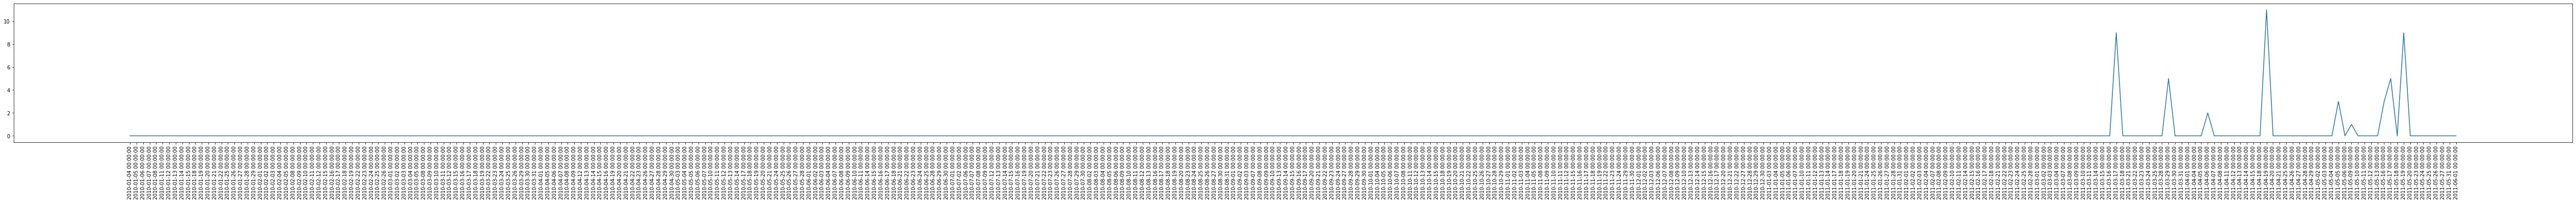

In [ ]:
fig = plt.figure(figsize=(90, 5))
ax = sub_df["File Open_count"].plot(xticks=sub_df.index, rot=90)
ax.set_xticklabels(sub_df.day);

#sub_df["File Open_count"].plot()

In [ ]:
## Load LDAP files
import pandas as pd

ldap_files = glob.glob("/home/amr/uni/AI-for-CS/insider-threat/r5.2/LDAP/*.csv")
dfs = []
for f in ldap_files:
    dfs.append(pd.read_csv(f))
ldap = pd.concat(dfs, ignore_index=True).drop_duplicates()
ldap

,employee_name,user_id,email,role,projects,business_unit,functional_unit,department,team,supervisor
0,Maisie Maggy Kline,MMK1532,Maisie.Maggy.Kline@dtaa.com,Technician,NaN,2 - Executive,5 - SalesAndMarketing,3 - FieldService,3 - RegionalFieldService,Yvette Naomi Cortez
1,Nicole Tanya Burt,NTB0710,Nicole.Tanya.Burt@dtaa.com,SoftwareQualityEngineer,Project 110,2 - Executive,2 - ResearchAndEngineering,3 - SoftwareManagement,1 - SQA,Brennan Thaddeus Dominguez
2,Madeline Tatum Donaldson,MTD0971,Madeline.Tatum.Donaldson@dtaa.com,ElectricalEngineer,NaN,1 - Executive,2 - ResearchAndEngineering,3 - SoftwareManagement,6 - EmbeddedSoftware,Todd Rajah Peterson
3,Nicholas Hamish Browning,NHB1529,Nicholas.Hamish.Browning@dtaa.com,Technician,NaN,2 - Executive,5 - SalesAndMarketing,3 - FieldService,3 - RegionalFieldService,Yvette Naomi Cortez
4,Hoyt Berk Wiley,HBW0057,Hoyt.Berk.Wiley@dtaa.com,ProjectManager,NaN,1 - Executive,2 - ResearchAndEngineering,1 - ProjectManagement,NaN,Rina Adena Horn
...,...,...,...,...,...,...,...,...,...,...
28891,Nicolas Blaine Larson,NBL1190,Nicolas.Blaine.Larson@dtaa.com,WebDeveloper,NaN,2 - Executive,2 - ResearchAndEngineering,3 - SoftwareManagement,7 - WebSoftware,Jackson Timothy Sullivan
31341,MacKenzie Alma Ruiz,MAR1075,MacKenzie.Alma.Ruiz@dtaa.com,Salesman,Project 110,1 - Executive,5 - SalesAndMarketing,2 - Sales,2 - RegionalSales,Carl John Graham
31741,Eaton Prescott Gilliam,EPG1196,Eaton.Prescott.Gilliam@dtaa.com,WebDeveloper,NaN,2 - Executive,2 - ResearchAndEngineering,3 - SoftwareManagement,7 - WebSoftware,Jackson Timothy Sullivan
32208,William Fulton Vega,WFV0687,William.Fulton.Vega@dtaa.com,ITAdmin,Project 142,2 - Executive,1 - Adminstration,6 - Security,2 - ElectronicSecurity,Jessica Jeanette Cline


In [ ]:
daily_features

,user,day,Logoff_count,Logon_count,Connect_device_count,Disconnect_device_count,File Open_count,File Write_count,http_count,Receive_email_count,Send_email_count,malicious
0,AAL1327,2010-01-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,AAL1327,2010-01-05,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,AAL1327,2010-01-06,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,AAL1327,2010-01-07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,AAL1327,2010-01-08,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66482,ZKP0542,2011-04-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
66483,ZKP0542,2011-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
66484,ZKP0542,2011-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
66485,ZKP0542,2011-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
daily_features = daily_features.rename(columns={'user':'user_id'})

daily_features = pd.merge(daily_features, ldap[['user_id','functional_unit']],on='user_id',
                          how='left')
daily_features = daily_features2.drop_duplicates()

<AxesSubplot:xlabel='File Open_count', ylabel='Density'>

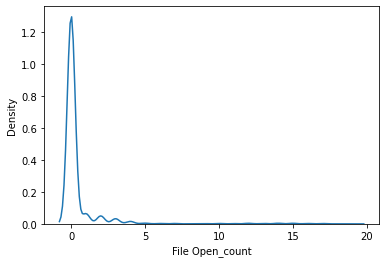

In [ ]:
import seaborn as sns

mal_user_unit = ldap[ldap['user_id'] == mal_user].functional_unit.values[0]

unit_features = daily_features[daily_features['functional_unit'] == '5 - SalesAndMarketing']

sns.kdeplot(data=unit_features, x="File Open_count")

# Modeling

## Single Model for All Users

In [ ]:
X = daily_features.drop(columns=['malicious', 'user_id', 'day', 'functional_unit'])
y = daily_features['malicious']

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X)

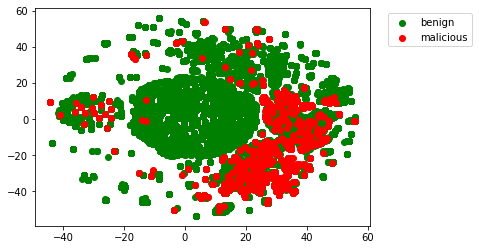

In [ ]:
labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_train == i,0], X_train_reduced[y_train == i,1], 
               label=labels[i], color=colors[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

contamination = np.linspace(0, 0.2, 50)

for cont in contamination:
    isolation_forest = IsolationForest(contamination=cont)
    isolation_forest.fit(X_train)

    test_preds = isolation_forest.predict(X_test)

    test_preds[test_preds == 1] = 0
    test_preds[test_preds == -1] = 1

    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    conf_mat = confusion_matrix(y_test, test_preds)

    print(f"Contamination = {cont} Accuracy = {acc} f1 = {f1}")
    print(conf_mat)

Contamination = 0.0 Accuracy = 0.9809288894236554 f1 = 0.0
[[16305     0]
 [  317     0]]
Contamination = 0.004081632653061225 Accuracy = 0.9768379256407171 f1 = 0.010282776349614395
[[16235    70]
 [  315     2]]
Contamination = 0.00816326530612245 Accuracy = 0.9722055107688605 f1 = 0.012820512820512822
[[16157   148]
 [  314     3]]
Contamination = 0.012244897959183675 Accuracy = 0.9681145469859223 f1 = 0.018518518518518517
[[16087   218]
 [  312     5]]
Contamination = 0.0163265306122449 Accuracy = 0.9642040668992901 f1 = 0.03252032520325203
[[16017   288]
 [  307    10]]
Contamination = 0.020408163265306124 Accuracy = 0.9608350379015762 f1 = 0.03840472673559822
[[15958   347]
 [  304    13]]
Contamination = 0.02448979591836735 Accuracy = 0.958609072313801 f1 = 0.06521739130434784
[[15910   395]
 [  293    24]]
Contamination = 0.028571428571428574 Accuracy = 0.9535555288172302 f1 = 0.06082725060827251
[[15825   480]
 [  292    25]]
Contamination = 0.0326530612244898 Accuracy = 0.951

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_preds)

#TR BEN      FALSE MAl
#FALSE BENG TRUE MAL

array([[14778,  1527],
       [  196,   121]])

## Split by Functional Unit

In [1]:
daily_features.functional_unit.unique()

NameError: ignored

In [ ]:
X = daily_features.drop(columns=['malicious', 'user_id', 'day'])
y = daily_features['malicious']

In [ ]:
X_sales = X[X['functional_unit']=='5 - SalesAndMarketing'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']=='5 - SalesAndMarketing']


tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)

In [ ]:

labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
X_sales = X[X['functional_unit']=='2 - ResearchAndEngineering'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']=='2 - ResearchAndEngineering']

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)


labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
X_sales = X[X['functional_unit']=='1 - Adminstration'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']=='1 - Adminstration']

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)


labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
X_sales = X[X['functional_unit']== '4 - Finance'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']== '4 - Finance']

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)


labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
X_sales = X[X['functional_unit']== '3 - Manufacturing'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']== '3 - Manufacturing']

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)


labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [ ]:
X_sales = X[X['functional_unit']== '6 - PurchasingAndContracts'].drop(columns=['functional_unit'])
y_sales = y[X['functional_unit']== '6 - PurchasingAndContracts']

tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_sales)


labels = ['benign', 'malicious']
colors = ['g', 'r']

for i in range(2):
    plt.scatter(X_train_reduced[y_sales == i,0], X_train_reduced[y_sales == i,1], 
               label=labels[i], color=colors[i])
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()